In [13]:
import glob,sys,os,re
import pickle
import numpy as np
import pandas as pd
from mylab.Functions import *
from core.context_exposure import *
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

## index celltypes

In [2]:
celltypes = index_celltypes(part=1)
# celltypes = glob.glob(r"C:\Users\qiushou\Desktop\part1\*.pkl")
celltypes = [i for i in celltypes if "20103" not in i]
# celltypes
[print(i) for i in celltypes if "2020061" in i]

\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200721_aim_ce.pkl
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200722_aim_ce.pkl
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200723_aim_ce.pkl
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200724_aim_ce.pkl


[None, None, None, None]

In [3]:
mouseids = ["2020061","206534","206548","206550","206551","206552","206553"]

Celltypes = {}
for mouseid in mouseids:
    Celltypes[mouseid] = [i for i in celltypes if mouseid in i]

Celltypes

{'2020061': ['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200721_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200722_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200723_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200724_aim_ce.pkl'],
 '206534': ['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part1_day20200721_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part1_day20200722_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part1_day20200723_aim_ce.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part1_day20200724_aim_ce.pkl'],
 '206548': ['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_20

## wenn fig for single day

### pool all the cells and count the number

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


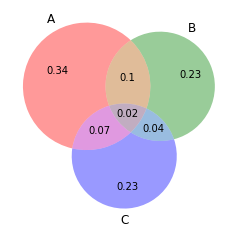

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


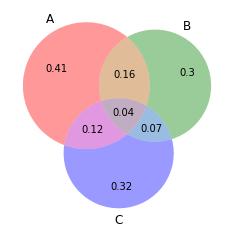

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


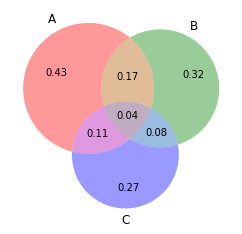

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


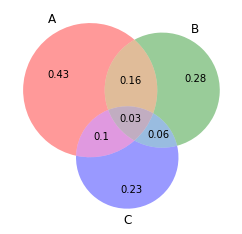

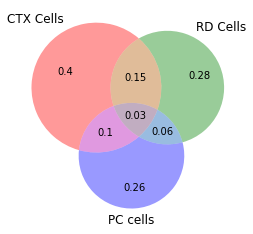

In [15]:
wenn_lists_aves=[]
for i in range(4):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    wenn_lists=[]
    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
        rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
        pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
#         print(rdcell_ids)
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

        pc_cellids = list(set(spread(pccell_id.values())))        
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        
        wenn_list = [len(ctx_cellids)/total_cell_num
                     ,len(rd_cellids)/total_cell_num
                     ,len(ctx_rd_cellids)/total_cell_num
                     ,len(pc_cellids)/total_cell_num
                     ,len(ctx_pc_cellids)/total_cell_num
                     ,len(rd_pc_cellids)/total_cell_num
                     ,len(ctx_rd_pc_cellids)/total_cell_num]
        
        wenn_lists.append(wenn_list)
    wenn_lists_ave = np.mean(wenn_lists,axis=0)
    wenn_lists_aves.append(wenn_lists_ave)
    wenn_lists_round2 = [round(i,2) for i in wenn_lists_ave]
    venn3(wenn_lists_round2)
    plt.show()
wenn_lists_aves_round2 = [round(i,2) for i in np.mean(wenn_lists_aves,axis=0)]
venn3(wenn_lists_aves_round2,set_labels=("CTX Cells","RD Cells","PC cells"))

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
1


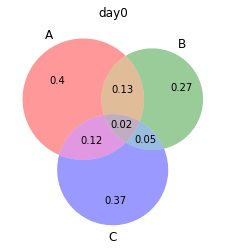

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
2


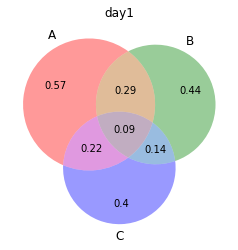

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
3


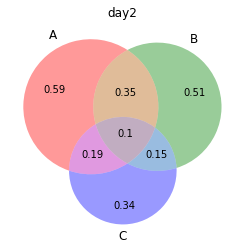

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
4


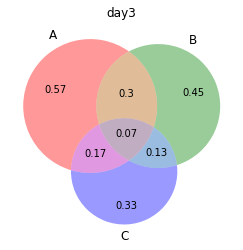

[[0.3961038961038961, 0.2683982683982684, 0.13095238095238096, 0.36688311688311687, 0.12229437229437229, 0.05194805194805195, 0.023809523809523808], [0.5746753246753247, 0.43614718614718617, 0.29004329004329005, 0.4036796536796537, 0.21536796536796537, 0.14177489177489178, 0.08982683982683982], [0.5909090909090909, 0.512987012987013, 0.3474025974025974, 0.3430735930735931, 0.18614718614718614, 0.15367965367965367, 0.09956709956709957], [0.5670995670995671, 0.4512987012987013, 0.2976190476190476, 0.329004329004329, 0.16558441558441558, 0.1341991341991342, 0.07467532467532467]]


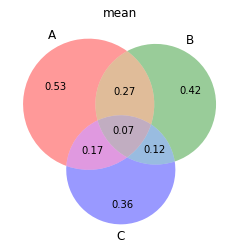

In [14]:
wenn_lists_days=[]
for i in range(4):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]

    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    
    ctx_cellids = list(set(spread(contextcell_id.values())))
    rd_cellids = list(set(spread(rdcell_id.values())))
    ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

    pc_cellids = list(set(spread(pccell_id.values())))        
    ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
    rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

    ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

    wenn_lists = [len(ctx_cellids)/total_cell_num
                 ,len(rd_cellids)/total_cell_num
                 ,len(ctx_rd_cellids)/total_cell_num
                 ,len(pc_cellids)/total_cell_num
                 ,len(ctx_pc_cellids)/total_cell_num
                 ,len(rd_pc_cellids)/total_cell_num
                 ,len(ctx_rd_pc_cellids)/total_cell_num]
    wenn_lists_days.append(wenn_lists)
    print(len(wenn_lists_days))
    wenn_lists_round2 = [round(i,2) for i in wenn_lists]
    venn3(wenn_lists_round2)
#     venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.show()
    
print(wenn_lists_days)
wenn_lists_days_mean = np.mean(wenn_lists_days,axis=0)
wenn_lists_days_mean_round2=[round(i,2) for i in wenn_lists_days_mean]
venn3(wenn_lists_days_mean_round2)
plt.title("mean")
plt.show()

\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206534_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206548_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206550_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206551_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206552_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206553_part1_day20200721_aim_ce.pkl
rdcells: try body_speed> 3cm/s


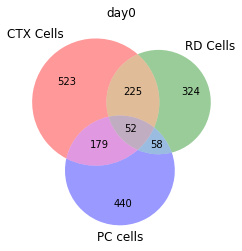

\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206534_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206548_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206550_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206551_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206552_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206553_part1_day20200722_aim_ce.pkl
rdcells: try body_speed> 3cm/s


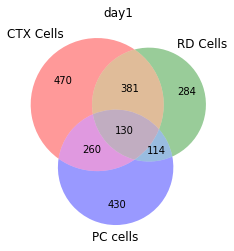

\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206534_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206548_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206550_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206551_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206552_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206553_part1_day20200723_aim_ce.pkl
rdcells: try body_speed> 3cm/s


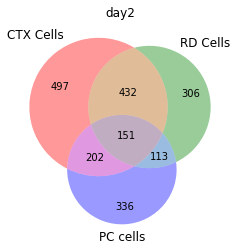

\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_2020061_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206534_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206548_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206550_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206551_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206552_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s
\\10.10.47.163\Data_archive\qiushou\results\celltypes\celltype_206553_part1_day20200724_aim_ce.pkl
rdcells: try body_speed> 3cm/s


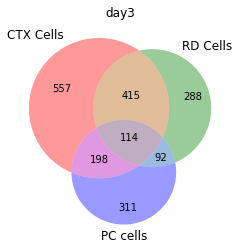

In [4]:
for i in range(4):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    for celltype_file in celltype_files:
        print(celltype_file)
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.show()

## for all mice in 4 days

### construct nums

In [5]:

nums = []
for i in range(4):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    num_per_day=[]
    for celltype_file in celltype_files:
        print(re.findall("(\d+)_part",celltype_file)[0])
        num_per_mouse = []
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        pc_cellids = list(set(spread(pccell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]
        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        num_per_mouse = [len(ctx_cellids),len(rd_cellids),len(pc_cellids)
                         ,len(ctx_rd_cellids),len(ctx_pc_cellids),len(rd_pc_cellids),len(ctx_rd_pc_cellids),
        total_cell_num]
        num_per_day.append(num_per_mouse)
                             
    nums.append(num_per_day)
nums = np.array(nums) # (day,mouse,type)
nums

2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s
2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s
2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s
2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
r

array([[[140,  76,  96,  40,  33,  11,   6, 343],
        [100,  48,  51,  35,  17,   8,   5, 209],
        [120,  69,  60,  36,  20,  10,   5, 294],
        [ 73,  75,  89,  17,  23,  16,   4, 304],
        [ 45,  85,  29,   9,   7,   7,   3, 328],
        [135,  58,  65,  19,  18,  10,   7, 412],
        [366, 248, 339, 121, 113,  48,  22, 924]],

       [[131,  91, 128,  40,  41,  21,   8, 343],
        [108,  73,  72,  52,  30,  21,  11, 209],
        [128,  73,  93,  46,  40,  16,   9, 294],
        [101,  80,  99,  27,  26,  22,   5, 304],
        [ 84,  79,  74,  30,  15,  13,   4, 328],
        [158, 110,  95,  48,  39,  20,  10, 412],
        [531, 403, 373, 268, 199, 131,  83, 924]],

       [[158, 112,  96,  65,  45,  26,  15, 343],
        [112,  65,  56,  45,  30,  16,   9, 209],
        [125,  59,  53,  35,  25,  10,   6, 294],
        [124, 103,  96,  50,  34,  27,  14, 304],
        [ 48, 104,  98,  20,  14,  30,   7, 328],
        [169,  85,  86,  47,  33,  13,   8, 41

### total cell numbers

In [6]:
np.sum(nums[:,:,7][0])

2814

### plot

Text(24.5, 0.1, 'p=0.07')

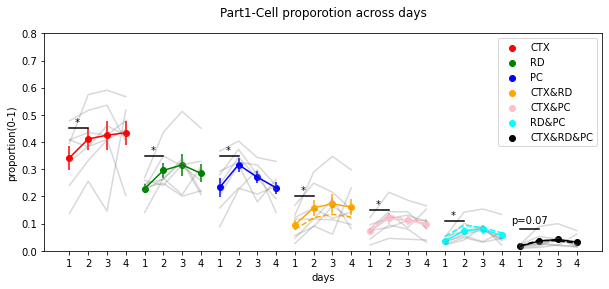

In [12]:
colors = ["red","green","blue","orange","pink","cyan","black"]
plt.figure(figsize=(10,4))
ys=[]
handles = []
for i in range(7):
    cell_types = nums[:,:,i]/nums[:,:,7] # calculate the proportion of each cell type
    x = np.array([1,2,3,4])+4*i
    y = np.mean(cell_types,axis=1)
    ys.append(y)
    sem = np.std(cell_types,axis=1,ddof=1)/np.sqrt(len(cell_types[0]))
    plt.plot(x,cell_types,color="gray",alpha=0.3)
    h = plt.scatter(x,y,color = colors[i])
    handles.append(h)
    plt.errorbar(x,y,yerr=sem,color = colors[i])
    if i == 3:
        plt.plot(x,ys[0]*ys[1],"--",color=colors[i])
    if i == 4:
        plt.plot(x,ys[0]*ys[2],"--",color=colors[i])
    if i == 5:
        plt.plot(x,ys[1]*ys[2],"--",color=colors[i])
    if i == 6:
        plt.plot(x,ys[0]*ys[1]*ys[2],"--",color=colors[i])
plt.legend(handles=handles,labels=["CTX","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC"])
plt.xticks(ticks=np.arange(1,29),labels=["1","2","3","4"]*7)
plt.xlabel("days")
plt.ylabel("proportion(0-1)")
plt.ylim(0,0.8)
plt.title("Part1-Cell proporotion across days",y=1.05)

plt.plot([1,2],[0.45,0.45],color="black");plt.annotate("*",xy=(1.3,0.46))
plt.plot([5,6],[0.35,0.35],color="black");plt.annotate("*",xy=(5.3,0.36))
plt.plot([9,10],[0.35,0.35],color="black");plt.annotate("*",xy=(9.3,0.36))
plt.plot([13,14],[0.2,0.2],color="black");plt.annotate("*",xy=(13.3,0.21))
plt.plot([17,18],[0.15,0.15],color="black");plt.annotate("*",xy=(17.3,0.16))
plt.plot([21,22],[0.11,0.11],color="black");plt.annotate("*",xy=(21.3,0.12))
plt.plot([25,26],[0.08,0.08],color="black");plt.annotate("p=0.07",xy=(24.5,0.1))

### statistic

In [9]:
from mylab.ana.Mstat import *

In [10]:
for i in range(7):
    print("--------------------------")
    cell_types = nums[:,:,i]/nums[:,:,7]
    for a,b in itertools.combinations([0,1,2,3],2):
        print(a,b,Wilcoxon_signed_ranktest(cell_types[a]-cell_types[b])[1])

--------------------------
0 1 0.03125
0 2 0.015625
0 3 0.296875
1 2 0.375
1 3 0.6875
2 3 1.0
--------------------------
0 1 0.078125
0 2 0.03125
0 3 0.296875
1 2 0.21875
1 3 0.578125
2 3 0.375
--------------------------
0 1 0.015625
0 2 0.24886387493792206
0 3 0.9375
1 2 0.109375
1 3 0.03125
2 3 0.375
--------------------------
0 1 0.027707849358079864
0 2 0.03125
0 3 0.109375
1 2 0.578125
1 3 0.8125
2 3 0.46875
--------------------------
0 1 0.015625
0 2 0.015625
0 3 0.07473549830588248
1 2 0.3454475304692257
1 3 0.296875
2 3 0.3454475304692257
--------------------------
0 1 0.015625
0 2 0.027707849358079864
0 3 0.07961580146011343
1 2 0.9375
1 3 0.078125
2 3 0.15625
--------------------------
0 1 0.015625
0 2 0.015625
0 3 0.11585149752593009
1 2 0.46875
1 3 0.578125
2 3 0.296875


C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
